<a href="https://colab.research.google.com/github/adrienpayong/educativecourse/blob/main/smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np
import os


class Smoothing:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path)

    def averaging_numpy(self):
        """this is the numpy implementation of average blur using open cv"""
        kernel = np.ones((5, 5), np.float32) / 25
        dst = cv2.filter2D(self.image, -1, kernel)

        cv2.imwrite(os.path.join("original.jpg"), self.image)
        cv2.imwrite(os.path.join("averaged_numpy.jpg"), dst)

    def average_bluring(self):
        blur = cv2.blur(self.image, (5, 5))
        cv2.imwrite(os.path.join("original.jpg"), self.image)
        cv2.imwrite(os.path.join("averaged_blur.jpg"), blur)

    def gaussian_blur(self):
        """instead of box kernel, gaussian kernel is used"""
        """ width and height of the kernel which should be positive and odd. """
        """sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If 
        both are given as zeros, they are calculated from the kernel size """

        blur = cv2.GaussianBlur(self.image, (5, 5), 0)
        cv2.imwrite(os.path.join("original.jpg"), self.image)
        cv2.imwrite(os.path.join("gaussian_blur.jpg"), blur)

    def median_blur(self):
        """ median of all the pixels under the kernel area and the central element is replaced with this median value"""
        """highly effective in salt and pepper noise"""
        """Kernel size should be odd number"""

        median = cv2.medianBlur(self.image, 5)
        cv2.imwrite(os.path.join("original.jpg"), self.image)
        cv2.imwrite(os.path.join("median_blur.jpg"), median)

    def bilateral_blur(self):
        """highly effective in noise removal while keeping edges sharp"""
        """Gaussian blurs the edges also,bilateral doesn't ,this is why it is kind of slow to gaussian"""
        """
        d: diameter of each pixel neighborhood that is used during filtering 
        sigmaColor: Filter sigma in the color 
            space. A larger value of the parameter means that farther colors within the pixel neighborhood .
        sigmaSpace:Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels 
            will influence each other as long as their colors are close enough """

        blur = cv2.bilateralFilter(self.image, 9, 75, 75)
        cv2.imwrite(os.path.join("original.jpg"), self.image)
        cv2.imwrite(os.path.join("bilateral_blur.jpg"), blur)



    



In [7]:
# smoothing images
image_path_src = os.path.join("test.jpg")
smoothing_object = Smoothing(image_path_src)
smoothing_object.averaging_numpy()
smoothing_object.median_blur()
smoothing_object.gaussian_blur()
smoothing_object.bilateral_blur()
smoothing_object.average_bluring()

In [8]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

In [9]:
image0 = cv2.imread("test.jpg")
image1 = cv2.imread("original.jpg")
image2 = cv2.imread("median_blur.jpg")
image3 = cv2.imread("gaussian_blur.jpg")
image4 = cv2.imread("bilateral_blur.jpg")
image5 = cv2.imread("averaged_blur.jpg")
image6 = cv2.imread("averaged_numpy.jpg")



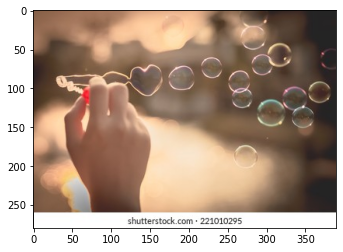

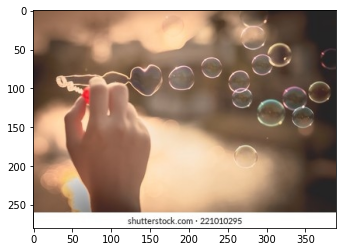

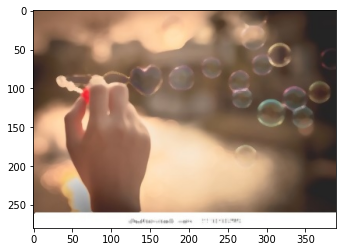

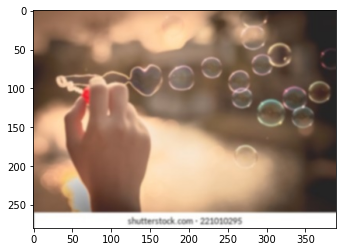

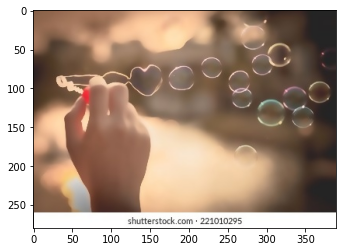

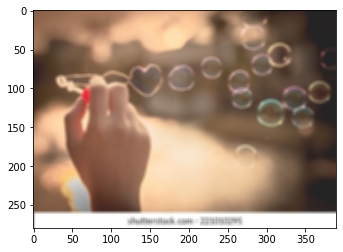

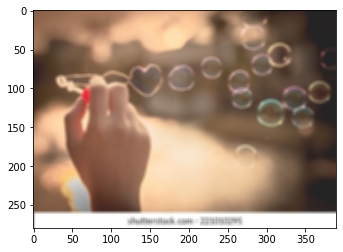

In [10]:
plt_imshow(image0)
plt_imshow(image1)
plt_imshow(image2)
plt_imshow(image3)
plt_imshow(image4)
plt_imshow(image5)
plt_imshow(image6)